In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import PIL.Image

In [4]:
!wget https://uiuc-ischool-dataviz.github.io/fall2020-BOG-BOU/week03/images/winter_scene.jpg

--2020-09-10 15:51:08--  https://uiuc-ischool-dataviz.github.io/fall2020-BOG-BOU/week03/images/winter_scene.jpg
Resolving uiuc-ischool-dataviz.github.io (uiuc-ischool-dataviz.github.io)... 185.199.110.153, 185.199.111.153, 185.199.109.153, ...
Connecting to uiuc-ischool-dataviz.github.io (uiuc-ischool-dataviz.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 517388 (505K) [image/jpeg]
Saving to: ‘winter_scene.jpg.1’

winter_scene.jpg.1  100%[===================>] 505.26K  --.-KB/s    in 0.02s   

2020-09-10 15:51:08 (21.1 MB/s) - ‘winter_scene.jpg.1’ saved [517388/517388]



In [5]:
image = PIL.Image.open("winter_scene.jpg")

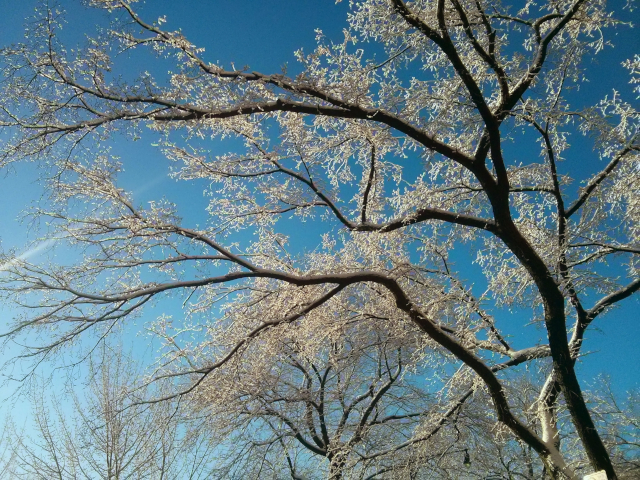

In [6]:
image

In [7]:
arr = np.array(image)

In [8]:
arr.shape

(480, 640, 3)

In [9]:
flat_image = arr.reshape((-1, 3))

In [10]:
flat_image.shape

(307200, 3)

In [11]:
flat_image[:10]

array([[ 40, 107, 150],
       [ 43, 108, 150],
       [ 43, 108, 150],
       [ 44, 108, 146],
       [ 45, 109, 147],
       [ 52, 114, 153],
       [ 45, 106, 150],
       [ 47, 109, 150],
       [ 44, 106, 145],
       [ 45, 109, 145]], dtype=uint8)

In [12]:
red_only = arr.copy()
red_only[:, :, 1] = 0
red_only[:, :, 2] = 0

green_only = arr.copy()
green_only[:, :, 0] = 0
green_only[:, :, 2] = 0

blue_only = arr.copy()
blue_only[:, :, 0] = 0
blue_only[:, :, 1] = 0

r_img = PIL.Image.fromarray(red_only)
g_img = PIL.Image.fromarray(green_only)
b_img = PIL.Image.fromarray(blue_only)

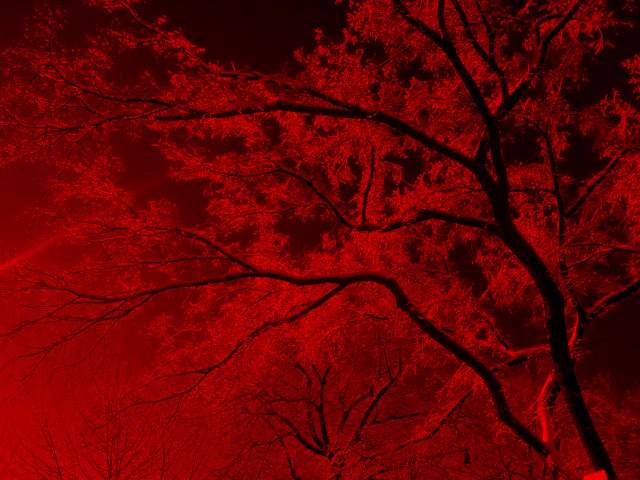

In [13]:
r_img

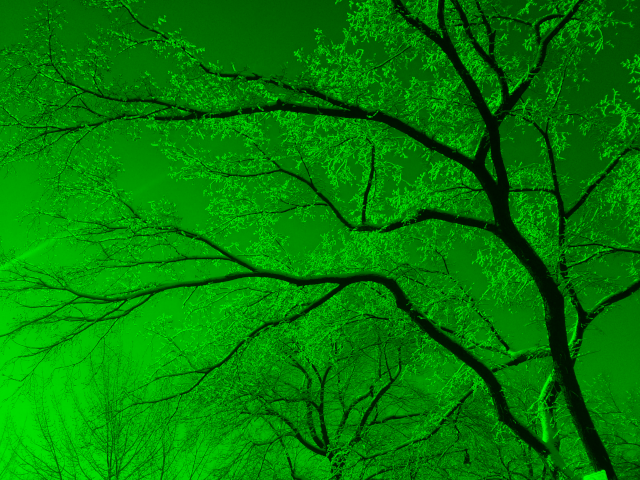

In [14]:
g_img

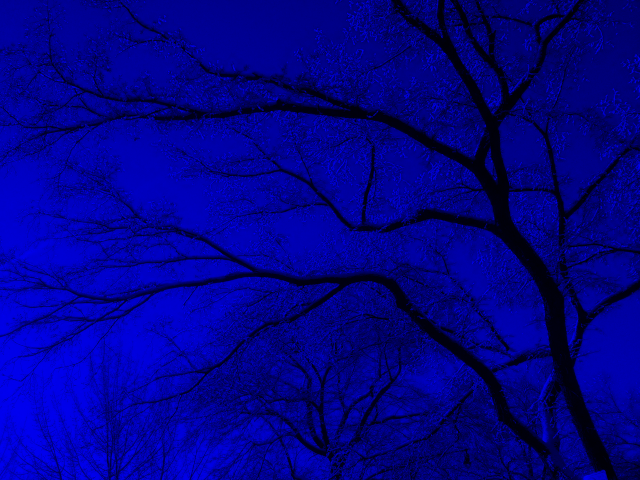

In [15]:
b_img

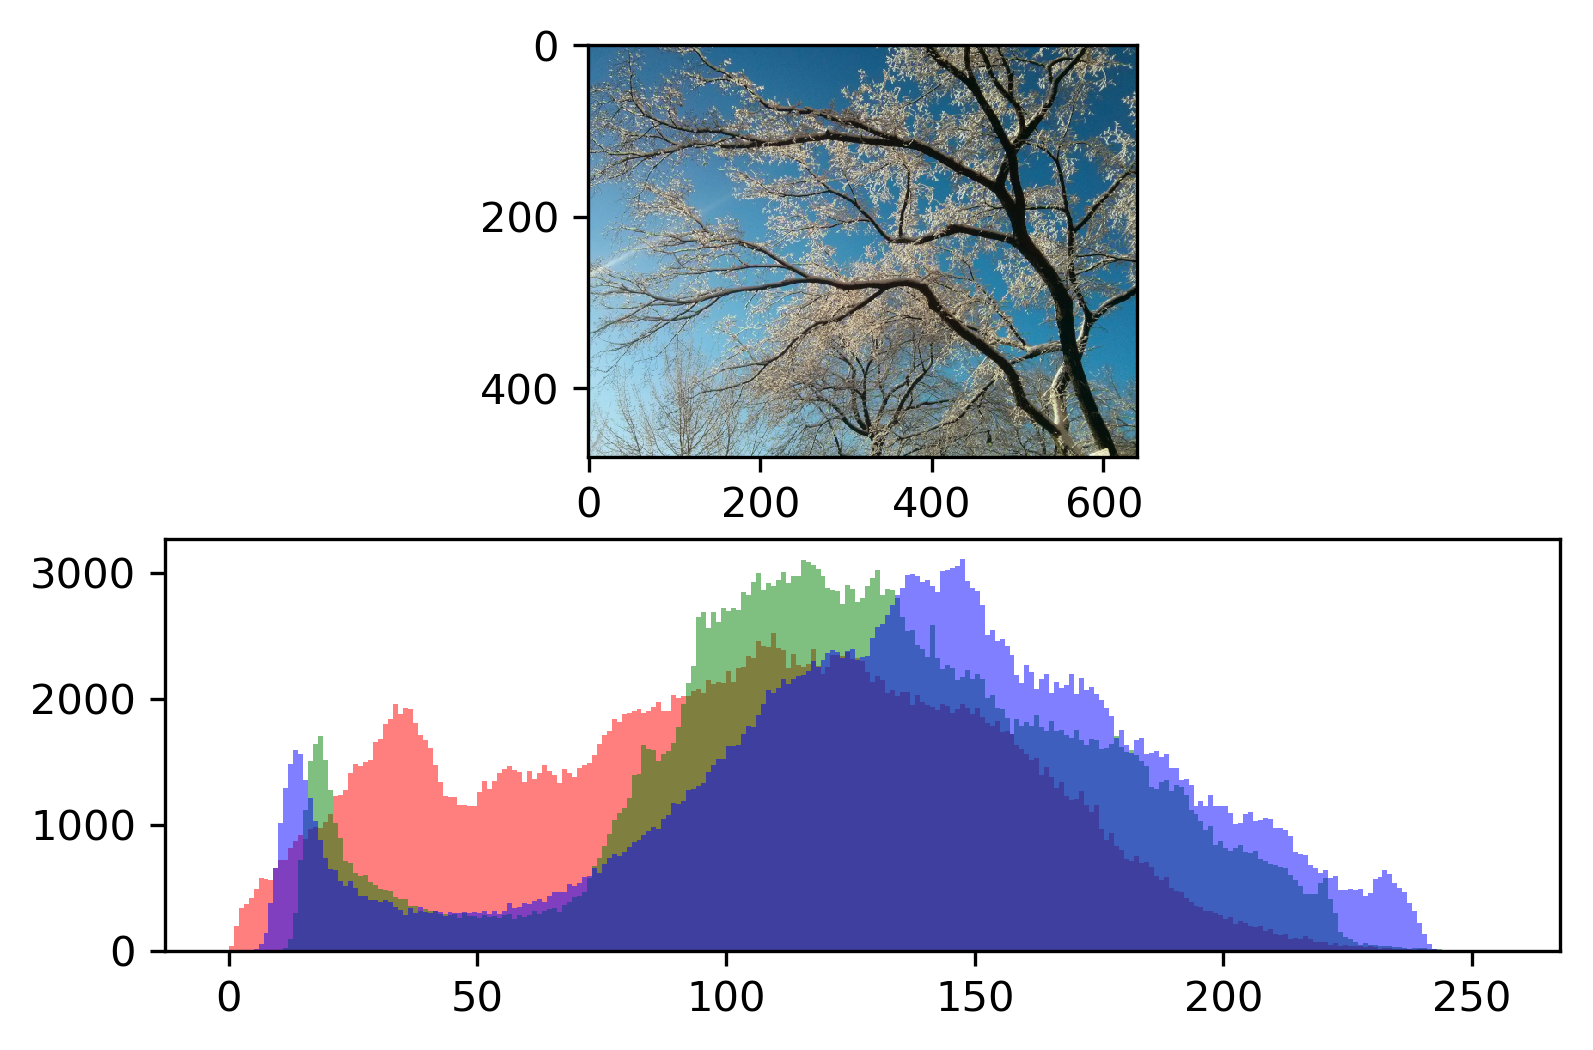

In [16]:
fig, ax = plt.subplots(2, 1, dpi = 300)
ax[0].imshow(arr)
ax[1].hist(flat_image[:,0], bins = np.arange(256), alpha=0.5, facecolor = 'red');
ax[1].hist(flat_image[:,1], bins = np.arange(256), alpha=0.5, facecolor = 'green');
ax[1].hist(flat_image[:,2], bins = np.arange(256), alpha=0.5, facecolor = 'blue');

In [17]:
!wget https://uiuc-ischool-dataviz.github.io/spring2019online/week05/data/single_dicom.h5

--2020-09-10 15:51:14--  https://uiuc-ischool-dataviz.github.io/spring2019online/week05/data/single_dicom.h5
Resolving uiuc-ischool-dataviz.github.io (uiuc-ischool-dataviz.github.io)... 185.199.110.153, 185.199.109.153, 185.199.111.153, ...
Connecting to uiuc-ischool-dataviz.github.io (uiuc-ischool-dataviz.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75499616 (72M) [application/octet-stream]
Saving to: ‘single_dicom.h5.1’

single_dicom.h5.1   100%[===================>]  72.00M   106MB/s    in 0.7s    

2020-09-10 15:51:15 (106 MB/s) - ‘single_dicom.h5.1’ saved [75499616/75499616]



In [18]:
import h5py

In [19]:
f = h5py.File("single_dicom.h5")

In [20]:
list(f.keys())

['scan']

In [21]:
scan = f["scan"][:]

In [22]:
scan.shape

(36, 512, 512)

In [23]:
scan[18, :, :].shape

(512, 512)

In [24]:
plt.rcParams["figure.dpi"] = 150

In [25]:
import matplotlib.colors as mc

In [26]:
import ipywidgets

In [27]:
my_norm = mc.LogNorm(vmin = 1.0, vmax = scan.max())

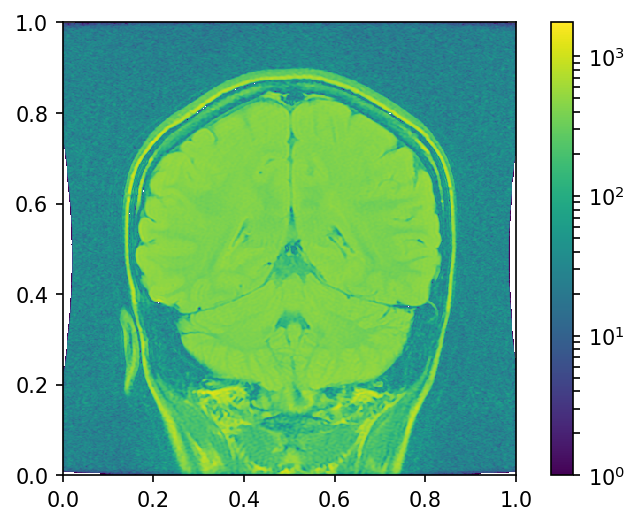

In [28]:
image = plt.imshow(scan[12,:,:], extent = [0, 1, 0, 1], norm=my_norm)
image.cmap.set_bad("white")
plt.colorbar()

In [29]:
@ipywidgets.interact(slice_coord = (0, 35), colormap = ["viridis", "magma", "cubehelix"])
def slice_scan(slice_coord, colormap = "viridis"):
    image = plt.imshow(scan[slice_coord,:,:], extent = [0, 1, 0, 1], norm=my_norm, cmap = colormap)
    plt.colorbar()

interactive(children=(IntSlider(value=17, description='slice_coord', max=35), Dropdown(description='colormap',…